In [68]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import matplotlib.patches as mpatch
%matplotlib inline

In [2]:
city_data_to_read = "resources/city_data.csv"
ride_data_to_read = "resources/ride_data.csv"

In [3]:
city_data_df = pd.read_csv(city_data_to_read)
ride_data_df = pd.read_csv(ride_data_to_read)

In [4]:
city_ride_merged_df = ride_data_df.merge(city_data_df, left_on='city', right_on='city')
city_ride_merged_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
5,Lake Jonathanshire,2019-04-06 11:30:32,16.84,6164453571846,5,Urban
6,Lake Jonathanshire,2019-03-21 00:18:34,37.95,8353656732934,5,Urban
7,Lake Jonathanshire,2019-01-28 00:07:00,5.67,9756573174778,5,Urban
8,Lake Jonathanshire,2019-01-24 12:24:22,34.65,3319117904437,5,Urban
9,Lake Jonathanshire,2019-03-24 16:27:49,14.94,1670908453476,5,Urban


In [5]:
city_ride_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [6]:
city_ride_merged_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [7]:
city_ride_merged_df.isnull().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

In [8]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
urban_cities_df = city_ride_merged_df[city_ride_merged_df["type"] == "Urban"]
suburban_cities_df = city_ride_merged_df[city_ride_merged_df["type"] == "Suburban"]
rural_cities_df = city_ride_merged_df[city_ride_merged_df["type"] == "Rural"]
rural_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,Randallchester,2019-02-19 03:52:47,58.55,8004803682564,9,Rural
2252,Randallchester,2019-02-11 05:42:29,25.78,9010611749008,9,Rural
2253,Randallchester,2019-03-25 13:36:46,10.37,3216382725494,9,Rural
2254,Randallchester,2019-04-07 23:42:07,10.79,1615474447641,9,Rural
2255,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2256,North Holly,2019-02-16 17:02:51,39.46,4571476032148,8,Rural
2257,North Holly,2019-01-04 03:31:26,24.88,4195619112933,8,Rural
2258,North Holly,2019-04-21 21:14:22,18.54,6259094156900,8,Rural
2259,North Holly,2019-03-28 00:12:09,35.45,3262489198068,8,Rural


In [10]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [11]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [12]:
rural_ride_count = rural_cities_df.groupby(['city']).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [13]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [14]:
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [15]:
rural_avg_fare = rural_cities_df.groupby(['city']).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [16]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [17]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [18]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

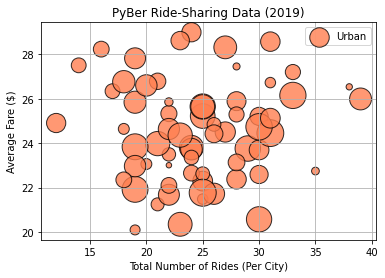

In [19]:
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c='coral', edgecolor ='black', linewidths=1, alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

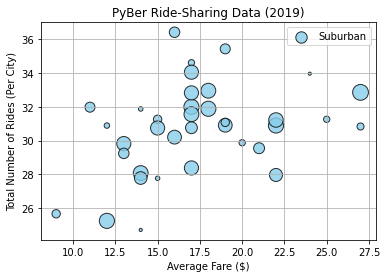

In [20]:
plt.scatter(suburban_ride_count, suburban_avg_fare, c='skyblue', s=10*suburban_driver_count, edgecolor='black', linewidths=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

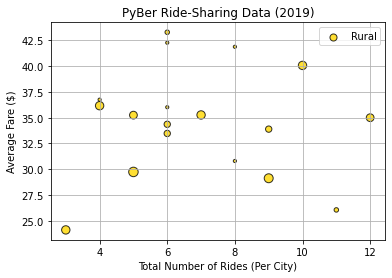

In [21]:
plt.scatter(rural_ride_count, rural_avg_fare, c='gold', s=10*rural_driver_count, edgecolor='black', linewidths=1, alpha=0.8, label="Rural")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

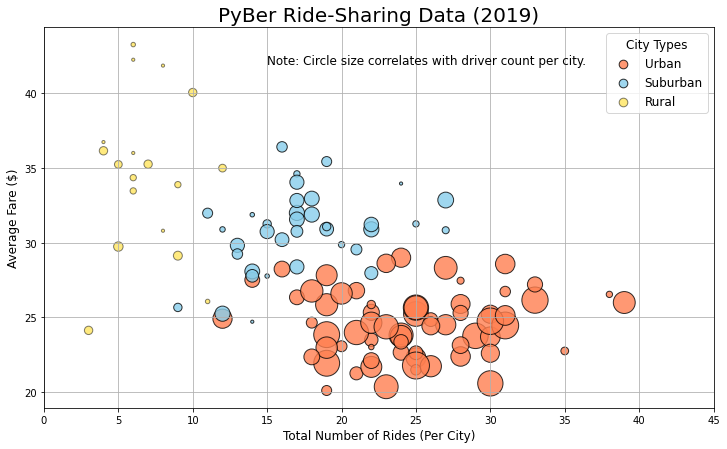

In [22]:
plt.subplots(figsize=(12, 7))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.5, label="Rural")

# Incorporate the other graph properties
plt.xlim(0,45)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)


# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(15, 42, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Show the plot
#plt.plot()
plt.savefig("analysis/Fig1.png")

In [23]:

urban_ride_count.mode()


0    22
1    25
dtype: int64

In [24]:
suburban_ride_count.mode()

0    17
dtype: int64

In [25]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [26]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [27]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [28]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [29]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for ruraln trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for ruraln trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [30]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    31.25
2    19.89
3    24.28
4    13.89
Name: fare, dtype: float64

In [31]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    30.38
1627    36.13
1628    44.24
1629    36.49
Name: fare, dtype: float64

In [32]:
# Get the fares for the suburban cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    58.55
2252    25.78
2253    10.37
2254    10.79
Name: fare, dtype: float64

In [33]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [34]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")


The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [35]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [36]:
# Get the driver count data from the urban cities. - Different from textbook... must have caused by merger?
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0    5
1    5
2    5
3    5
4    5
Name: driver_count, dtype: int64

In [37]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    11
1627    11
1628    11
1629    11
Name: driver_count, dtype: int64

In [38]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    9
2252    9
2253    9
2254    9
Name: driver_count, dtype: int64

In [39]:
# Calculate the measures of central tendency for the average drivers for the urban cities.
mean_urban_drivers = round(np.mean(urban_drivers))
print(f"The mean for urban drivers is {mean_urban_drivers}.")

median_urban_drivers = round(np.median(urban_drivers))
print(f"The median for urban drivers is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode for urban drivers is {mode_urban_drivers}.")

The mean for urban drivers is 37.
The median for urban drivers is 37.
The mode for urban drivers is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [40]:
# Calculate the measures of central tendency for the average drivers for the suburban cities.
mean_suburban_drivers = round(np.mean(suburban_drivers))
print(f"The mean for suburban drivers is {mean_suburban_drivers}.")

median_suburban_drivers = round(np.median(suburban_drivers))
print(f"The median for suburban drivers is {median_suburban_drivers}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode for suburban drivers is {mode_suburban_drivers}.")

suburban_drivers.describe()

The mean for suburban drivers is 14.
The median for suburban drivers is 16.
The mode for suburban drivers is ModeResult(mode=array([20], dtype=int64), count=array([79])).


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [41]:
# Calculate the measures of central tendency for the average drivers for the rural cities.
mean_rural_drivers = round(np.mean(rural_drivers))
print(f"The mean for rural drivers is {mean_rural_drivers}.")

median_rural_drivers = round(np.median(rural_drivers))
print(f"The median for rural drivers is {median_rural_drivers}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode for rural drivers is {mode_rural_drivers}.")

The mean for rural drivers is 4.
The median for rural drivers is 4.
The mode for rural drivers is ModeResult(mode=array([1], dtype=int64), count=array([32])).


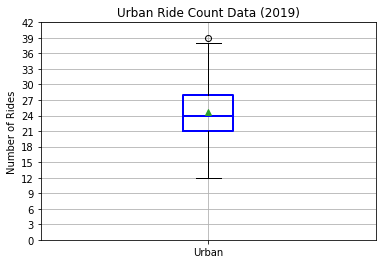

In [42]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()

boxprops = dict(linestyle='-', linewidth=2, color='blue')
medianprops = dict(linestyle='-', linewidth=2, color='blue')

ax.boxplot(urban_ride_count, labels=x_labels, showmeans=True, boxprops=boxprops,medianprops=medianprops)

# Add the title, y-axis label and grid.
ax.set_title('Urban Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
#ax.set_facecolor('lightgreen')
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.show()

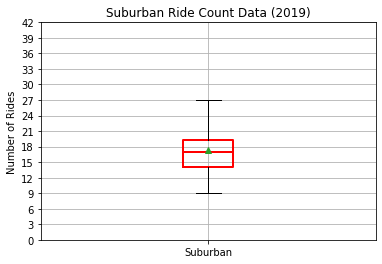

In [43]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
boxprops = dict(linestyle='-', linewidth=2, color='red')
medianprops = dict(linestyle='-', linewidth=2, color='red')

ax.boxplot(suburban_ride_count, labels=x_labels, showmeans=True, boxprops=boxprops,medianprops=medianprops)

# Add the title, y-axis label and grid.
ax.set_title('Suburban Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.show()

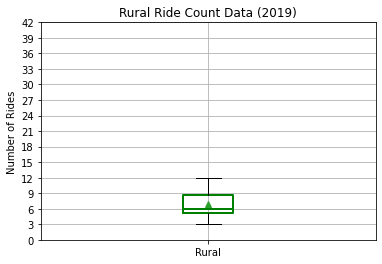

In [44]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
boxprops = dict(linestyle='-', linewidth=2, color='green')
medianprops = dict(linestyle='-', linewidth=2, color='green')

ax.boxplot(rural_ride_count, labels=x_labels, showmeans=True, boxprops=boxprops,medianprops=medianprops)

# Add the title, y-axis label and grid.
ax.set_title('Rural Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.show()

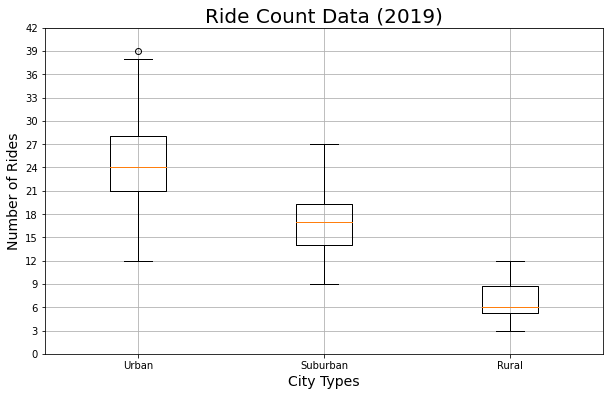

In [45]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

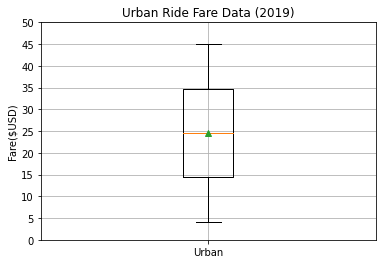

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [46]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels, showmeans=True)
# Add the title, y-axis label and grid.
ax.set_title('Urban Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

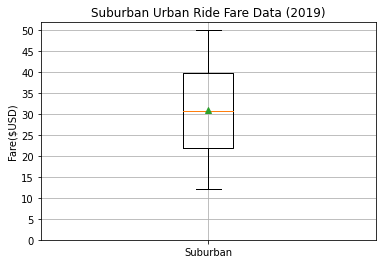

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [47]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels, showmeans=True,)
# Add the title, y-axis label and grid.
ax.set_title('Suburban Urban Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

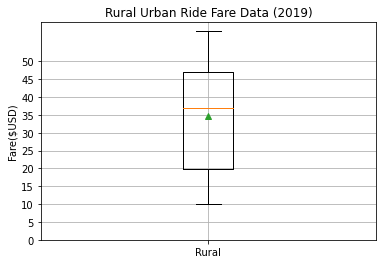

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [48]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels, showmeans=True,)
# Add the title, y-axis label and grid.
ax.set_title('Rural Urban Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

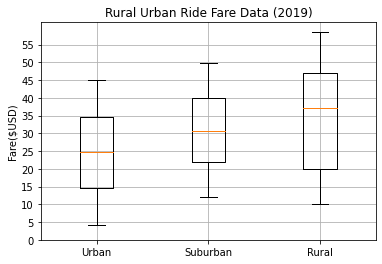

In [49]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Urban","Suburban","Rural"]
y_axis_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(y_axis_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Rural Urban Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 56, step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()

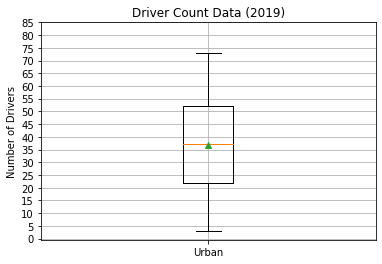

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [50]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels, showmeans=True,)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

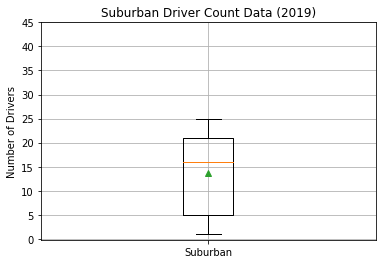

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [51]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels, showmeans=True,)
# Add the title, y-axis label and grid.
ax.set_title('Suburban Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 50, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

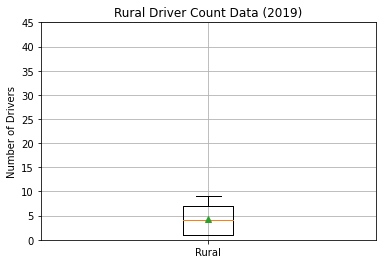

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [52]:
# Create the box-and-whisker plot for the Rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels, showmeans=True,)
# Add the title, y-axis label and grid.
ax.set_title('Rural Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 50, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

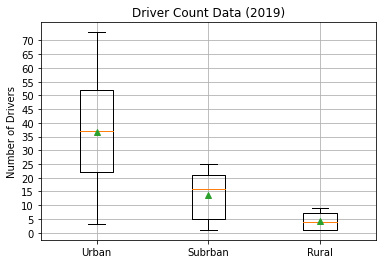

In [53]:
# Create the box-and-whisker plot for the all three driver count data.
x_labels = ["Urban", "Subrban", "Rural"]
y_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(y_data,labels=x_labels, showmeans=True,)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()


In [55]:
# Get the sum of the fares for each city type.
sum_fares_by_type = city_ride_merged_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [56]:
# Get the sum of all the fares.
total_fares = city_ride_merged_df["fare"].sum()
total_fares

63538.64

In [57]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * city_ride_merged_df.groupby(["type"]).sum()["fare"] / city_ride_merged_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

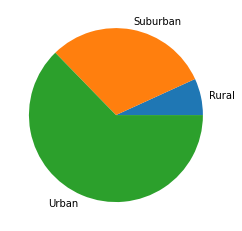

In [58]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

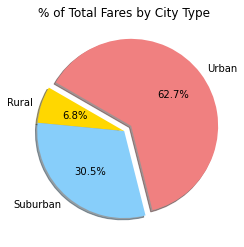

In [69]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()